# TASK - 1
**Shreyan Das**

## Prediction Using Supervised Learning
**Objective(s)**: To predict the percentage of a student based on study hours

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

### The dataset

In [3]:
data = pd.read_csv("http://bit.ly/w-data")

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plots

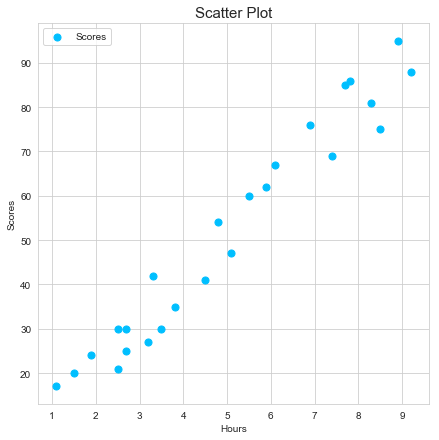

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(x='Hours',y='Scores',data=data,c='deepskyblue',marker='o',s=50)
plt.title('Scatter Plot',fontdict={'fontsize':15})
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

Text(0.5, 1.0, 'Objective Regression Line')

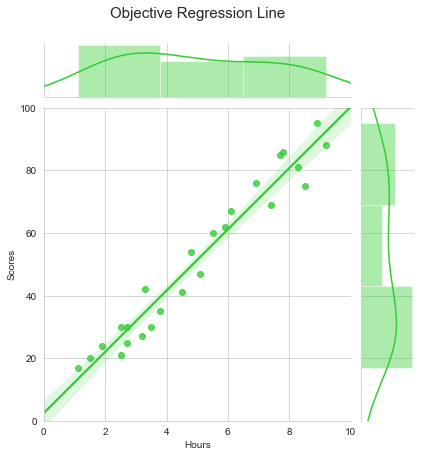

In [8]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='reg',color='limegreen',ylim=(0,100),xlim=(0,10))
plt.title('Objective Regression Line',pad=90,fontdict={'fontsize': 15})

### Training

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Evaluation

In [13]:
from sklearn import metrics

In [14]:
predictions = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,86,79.422202
1,17,13.736791
2,75,86.284857
3,27,34.324756
4,21,27.462101


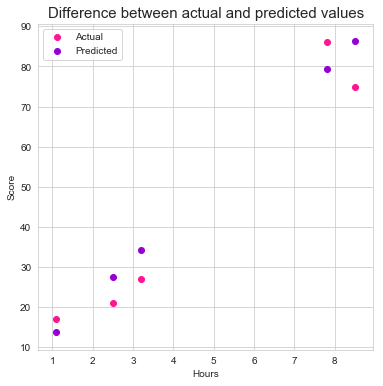

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(X_test,y_test,c='deeppink',label='Actual')
plt.scatter(X_test,predictions,c='darkviolet',label='Predicted')
plt.title('Difference between actual and predicted values',fontdict={'fontsize': 15})
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()
plt.show()

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.982544121187429
MSE: 55.33495112122292
RMSE: 7.438746609558826


In [18]:
regressor.score(X_test,y_test)

0.9351259717674651

Text(0.5, 1.0, 'Difference between Best fit and Calculated fit')

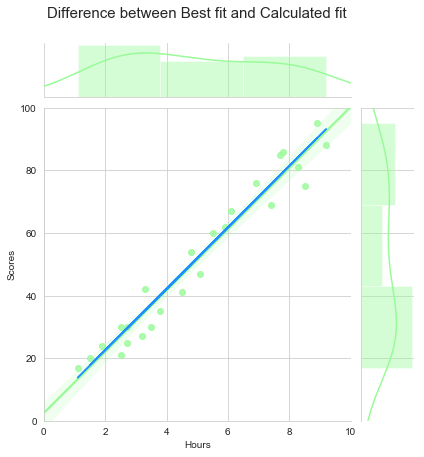

In [19]:
sns.jointplot(x='Hours',y='Scores',data=data,kind='reg',color='palegreen',ylim=(0,100),xlim=(0,10))
plt.plot(X,regressor.coef_*X+regressor.intercept_,color='dodgerblue')
plt.title('Difference between Best fit and Calculated fit',pad=90,fontdict={'fontsize': 15})

### Prediction

In [20]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("Prediction of score for " + str(hours[0][0]) + " = " + str(own_pred[0]) + "%")

Prediction of score for 9.25 = 93.63770162410414%
